In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('./CDNOW.txt', names = columns, sep = '\s+')

In [5]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [7]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [23]:
df['order_date'] = pd.to_datetime(df.order_dt, format = '%Y%m%d')
df['month'] = df.order_date.astype('datetime64[ns]')

In [24]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-12
2,2,19970112,5,77.00,1997-01-12,1997-01-12
3,3,19970102,2,20.76,1997-01-02,1997-01-02
4,3,19970330,2,20.76,1997-03-30,1997-03-30


In [25]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


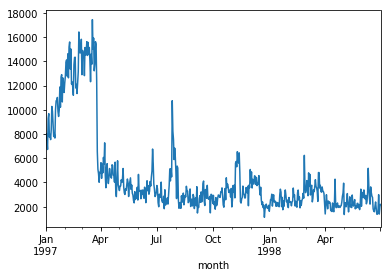

In [26]:
df.groupby('month').order_amount.sum().plot()

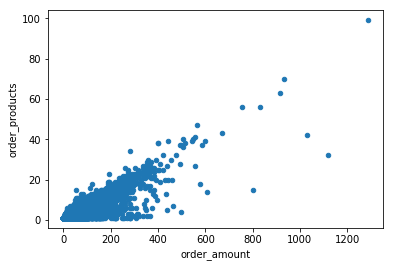

In [27]:
# 绘制每笔订单的散点图
df.plot.scatter(x = 'order_amount', y = 'order_products')


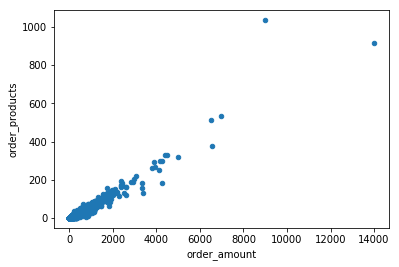

In [28]:
# 绘制用户的订单散点图
df.groupby('user_id').sum().plot.scatter(x = 'order_amount', y = 'order_products')

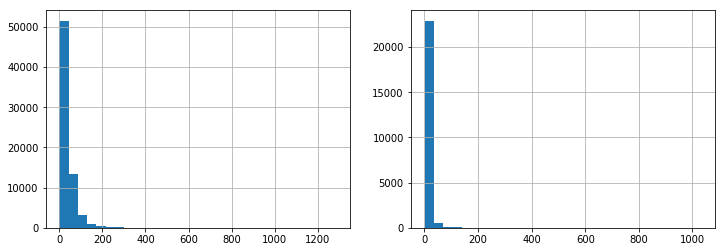

In [29]:
# 分析单个用户的消费行为
plt.figure(figsize = (12,4))
plt.subplot(121)
df.order_amount.hist(bins = 30)
plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins = 30)

In [31]:
# 观察消费的时间节点
# 用户初次消费月份
df.groupby('user_id').month.min().value_counts()

1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
1997-02-27    339
1997-03-06    337
1997-02-03    335
1997-02-17    332
1997-02-25    328
1997-03-05    325
1997-01-29    322
1997-03-12    321
1997-03-02    317
1997-02-09    316
1997-02-26    315
1997-02-18    315
1997-03-10    314
1997-01-19    314
1997-01-27    308
1997-03-07    306
1997-02-01    305
1997-01-26    305
1997-03-01    300
1997-03-03    300
1997-02-10    300
1997-03-09    299
1997-03-16    299
1997-01-24    299
1997-02-11    296
             ... 
1997-03-20    271
1997-01-31    267
1997-01-12    266
1997-03-24    263
1997-01-23    262
1997-02-22    262
1997-01-06    261
1997-01-25    256
1997-02-21    254
1997-03-15    253
1997-03-22    250
1997-01-05    250
1997-01-21    248
1997-02-14    244
1997-01-02    241
1997-03-25    241
1997-01-17    236
1997-01-16    234
1997-01-13    232
1997-01-03    228
1997-01-22    220
1997-01-14    220
1997-01-09    219
1997-01-15    219
1997-01-10

In [32]:
df.groupby('user_id').month.max().value_counts()


1997-02-08    221
1997-03-12    213
1997-02-04    210
1997-03-06    204
1997-02-27    202
1997-02-10    202
1997-03-04    201
1997-02-03    196
1997-02-25    195
1997-02-01    192
1997-02-06    191
1997-02-24    188
1997-03-05    188
1997-03-18    188
1997-02-26    187
1997-03-10    185
1997-03-01    183
1997-02-18    181
1997-03-03    178
1997-03-16    178
1997-02-07    177
1997-02-09    176
1997-03-17    175
1997-03-24    173
1997-01-27    173
1997-03-23    173
1997-02-28    172
1997-02-15    172
1997-01-19    172
1997-03-09    171
             ... 
1997-10-18      9
1997-07-02      8
1997-10-05      8
1997-08-29      8
1997-07-03      8
1997-07-05      8
1997-08-11      8
1997-09-30      8
1997-07-17      8
1997-09-08      8
1997-12-31      7
1997-06-14      7
1997-07-15      7
1997-08-06      7
1997-09-04      7
1997-10-02      7
1997-06-13      6
1997-07-16      6
1997-08-09      6
1997-08-05      6
1997-09-03      6
1997-07-11      5
1997-09-26      5
1997-08-08      5
1997-06-05

In [33]:
# 分析复购率和回购率
pivoted_counts = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'order_dt', aggfunc = 'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-01-02,1997-01-03,1997-01-04,1997-01-05,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,...,1998-06-21,1998-06-22,1998-06-23,1998-06-24,1998-06-25,1998-06-26,1998-06-27,1998-06-28,1998-06-29,1998-06-30
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


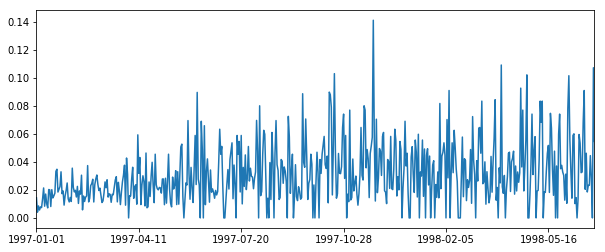

In [34]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))


In [35]:
pivoted_amount = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'order_amount', aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-01-02,1997-01-03,1997-01-04,1997-01-05,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,...,1998-06-21,1998-06-22,1998-06-23,1998-06-24,1998-06-25,1998-06-26,1998-06-27,1998-06-28,1998-06-29,1998-06-30
user_id,,,,,,,,,,,,,,,,,,,,,
1,11.77,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,20.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,29.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-01-02,1997-01-03,1997-01-04,1997-01-05,1997-01-06,1997-01-07,1997-01-08,1997-01-09,1997-01-10,...,1998-06-21,1998-06-22,1998-06-23,1998-06-24,1998-06-25,1998-06-26,1998-06-27,1998-06-28,1998-06-29,1998-06-30
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
user_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()
user_amount.tail()


,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [38]:
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum/amount_total, axis = 1)
user_amount.tail()


,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


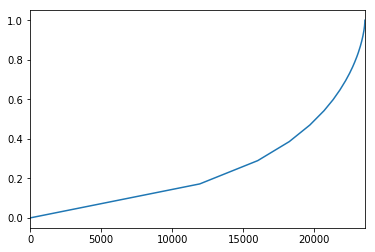

In [39]:
user_counts = df.groupby('user_id').order_dt.count().sort_values().reset_index()
user_counts['counts_cumsum'] = user_counts.order_dt.cumsum()
counts_total = user_counts.counts_cumsum.max()
user_counts['prop'] = user_counts.apply(lambda x: x.counts_cumsum/counts_total, axis = 1)
user_counts.prop.plot()


In [40]:
# 计算用户生命周期
user_purchase = df[['user_id','order_products','order_amount','order_date']]
order_date_min = user_purchase.groupby('user_id').order_date.min()
order_date_max = user_purchase.groupby('user_id').order_date.max()
(order_date_max-order_date_min).head(10)


user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [41]:
life_time = (order_date_max-order_date_min).reset_index() #转换为dataframe类型
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


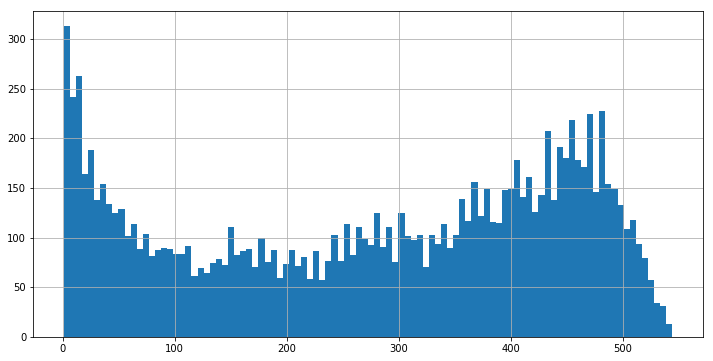

In [42]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins = 100, figsize = (12,6))


In [ ]:
# 计算用户平均消费间隔
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    #shift(-1)是向下便宜一个位置；shift()是向上偏移一个位置；加参数axis=1则是左右偏移
    return d
last_diff = user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10).reset_index()
--------------------- 
作者：unclezou 
来源：CSDN 
原文：https://blog.csdn.net/unclezou/article/details/86481689 
版权声明：本文为博主原创文章，转载请附上博文链接！